In [5]:
import seaborn as sns
import numpy as np
import pandas as pd

In [12]:
from io_utils import *
aucs = read_pkl('cross_val_aucs.pkl')
losses = read_pkl('cross_val_losses.pkl')

In [71]:
keywords = ['territory', 'cut', 'sente', 'shape', 'moyo',
            'ko', 'invasion', 'influence', 'wall', 'eye']

In [72]:
df = pd.DataFrame(columns=['val', 'depth', 'kw'])
for key in aucs:
    if 'bl' in key:
        continue
    val, depth, kw = int(key[3]), int(key[10]), int(key[-1])
    auc, loss = aucs[key], losses[key]
    s = pd.Series({'val':val, 'depth':depth, 'kw':keywords[kw], 'auc':auc, 'loss':loss.item()})
    df = df.append(s, ignore_index=True)

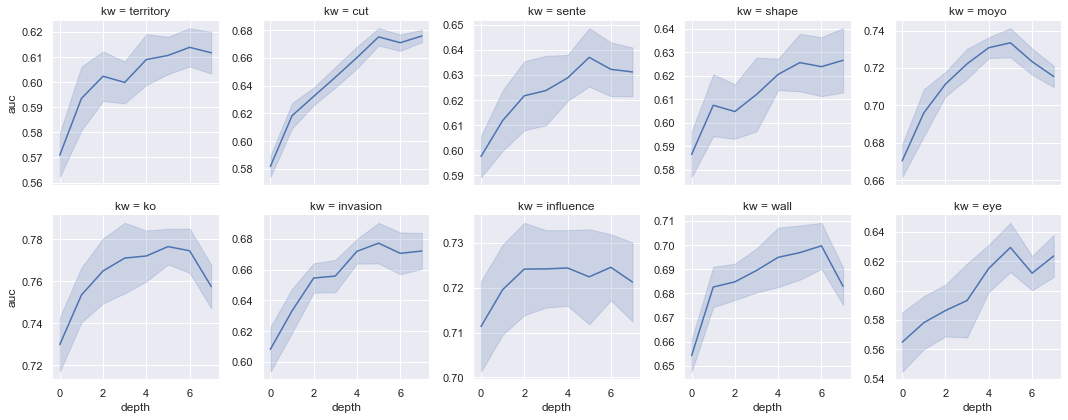

In [112]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(data=df, col='kw', col_wrap=5, sharey=False)
g.map(sns.lineplot, "depth", "auc", ci='sd')

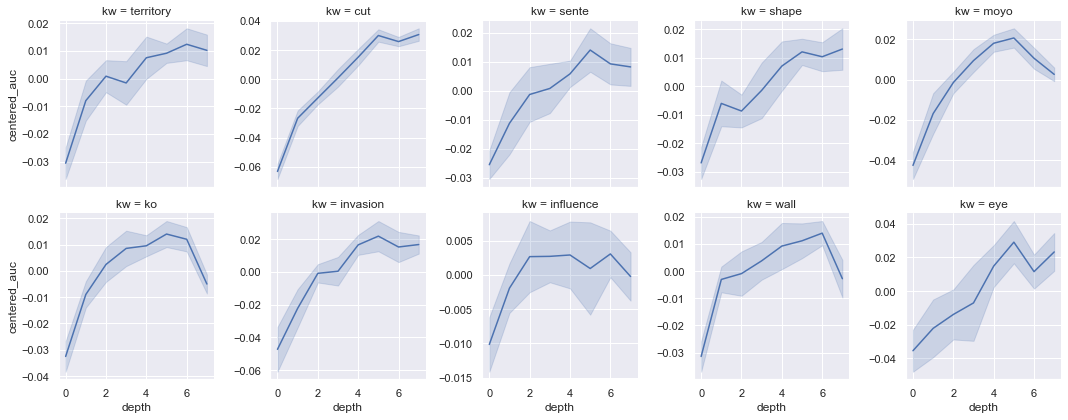

In [109]:
df['centered_auc'] = df['auc'] - df.groupby(['val', 'kw']).transform('mean')['auc']
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(data=df, col='kw', col_wrap=5, sharey=False)
g.map(sns.lineplot, "depth", "centered_auc", ci='sd')

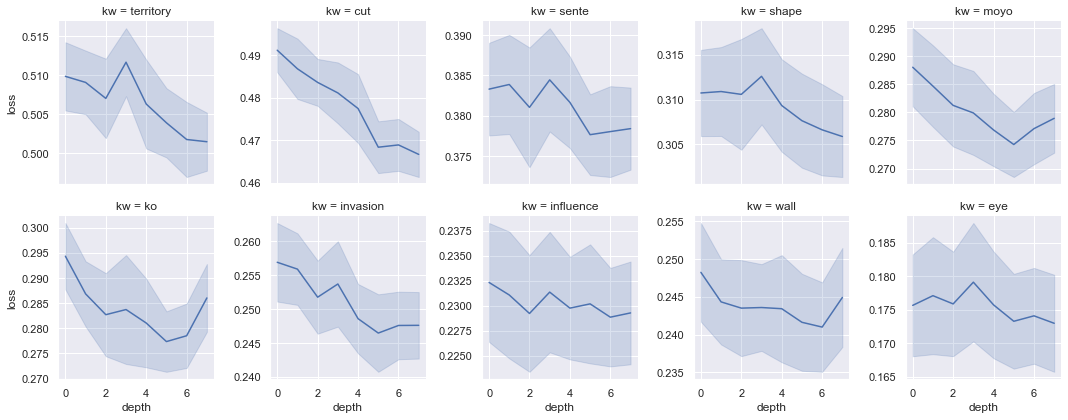

In [111]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(data=df, col='kw', col_wrap=5, sharey=False)
g.map(sns.lineplot, "depth", "loss", ci='sd')

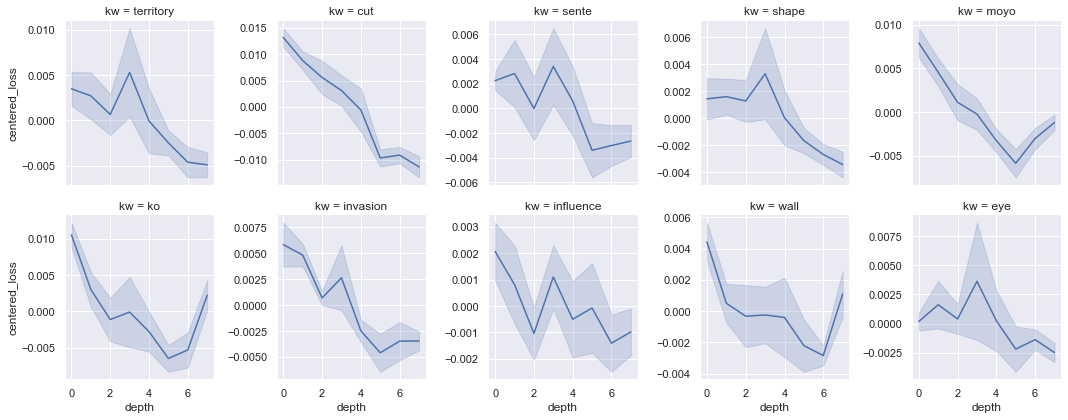

In [110]:
df['centered_loss'] = df['loss'] - df.groupby(['val', 'kw']).transform('mean')['loss']
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(data=df, col='kw', col_wrap=5, sharey=False)
g.map(sns.lineplot, "depth", "centered_loss", ci='sd')